In [1]:
import sys
from pathlib import Path
import torch

root = Path("..").resolve()
sys.path.append(str(root / "src"))

from data_loader import create_dataloaders

train_loader, val_loader, test_loader = create_dataloaders(
    size=128,
    batch_size=4,
    num_workers=0,
)

images, masks = next(iter(train_loader))
print("Images shape:", images.shape)
print("Masks shape:", masks.shape)
print("Mask min:", masks.min().item(), "max:", masks.max().item())
print("Mask unique values:", torch.unique(masks))


c:\Users\Olt Kondirolli\AppData\Local\Programs\Python\Python313\Lib\site-packages\humbug\report.py:47: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources  # type: ignore
c:\Users\Olt Kondirolli\AppData\Local\Programs\Python\Python313\Lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (4.4.1) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


Loading ECSSD from Deep Lake hub://activeloop/ecssd


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/ecssd



-

hub://activeloop/ecssd loaded successfully.



Total samples 1000
Train 700, Val 150, Test 150
Images shape: torch.Size([4, 3, 128, 128])
Masks shape: torch.Size([4, 1, 128, 128])
Mask min: 0.0 max: 1.0
Mask unique values: tensor([0., 1.])


In [2]:
import deeplake
import numpy as np

ds = deeplake.load("hub://activeloop/ecssd", read_only=True)
print("Dataset length:", len(ds))

sample = ds[0]
mask_arr = sample["masks"].numpy()

print("Raw mask shape:", mask_arr.shape)
print("Raw mask dtype:", mask_arr.dtype)
print("Raw mask min / max:", mask_arr.min(), mask_arr.max())

# Show a few unique values
flat = np.asarray(mask_arr).ravel()
print("Some unique values:", np.unique(flat)[:10])


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/ecssd



-

hub://activeloop/ecssd loaded successfully.



Dataset length: 1000
Raw mask shape: (328, 400, 1)
Raw mask dtype: bool
Raw mask min / max: False True
Some unique values: [False  True]


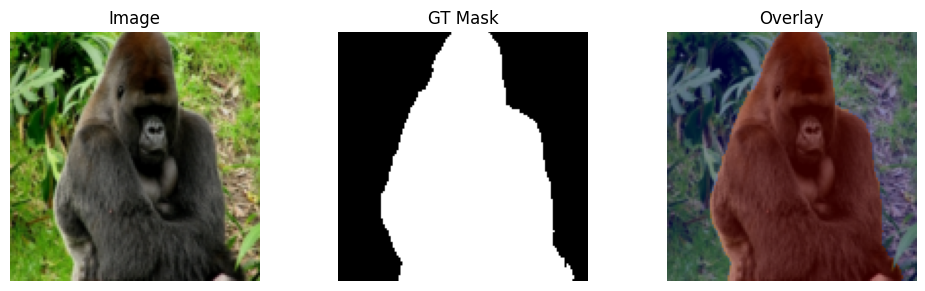

In [3]:
import matplotlib.pyplot as plt

images, masks = next(iter(train_loader))

# Take first sample in the batch
img = images[0]   # [3, 128, 128]
mask = masks[0]   # [1, 128, 128]

img_np = img.permute(1, 2, 0).numpy()
mask_np = mask.squeeze(0).numpy()

plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(img_np)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("GT Mask")
plt.imshow(mask_np, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(img_np)
plt.imshow(mask_np, cmap="jet", alpha=0.4)
plt.axis("off")

plt.tight_layout()
plt.show()
